# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generate an AR model of the first order with $\phi = 0.7$

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [2]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31', freq='D')

In [3]:
# store the parameters
mu = 5
start = 8
phi = .7
noise = np.random.normal(0,2,len(dates))

In [4]:
Y = []

y_prev = start

for e in noise:
    y_curr = mu + e + (y_prev*phi)
    Y.append(y_curr)
    y_prev = y_curr - mu

In [5]:
ts = pd.Series(Y, index=dates)

Plot the time series and verify what you see

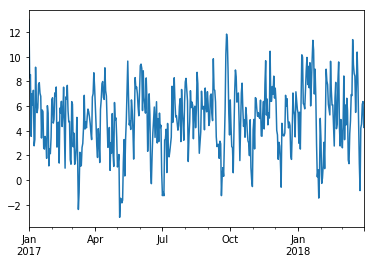

In [6]:
ts.plot()

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


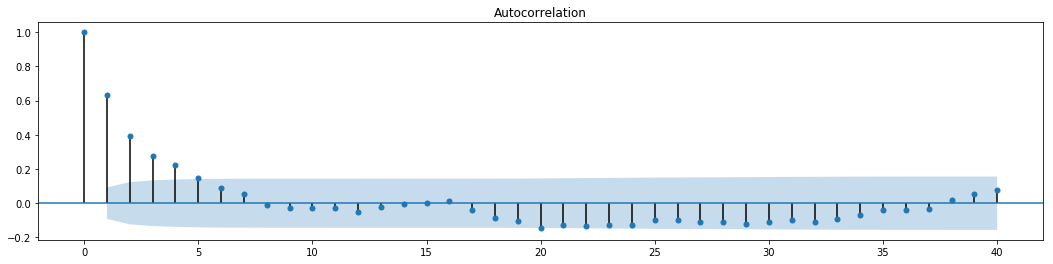

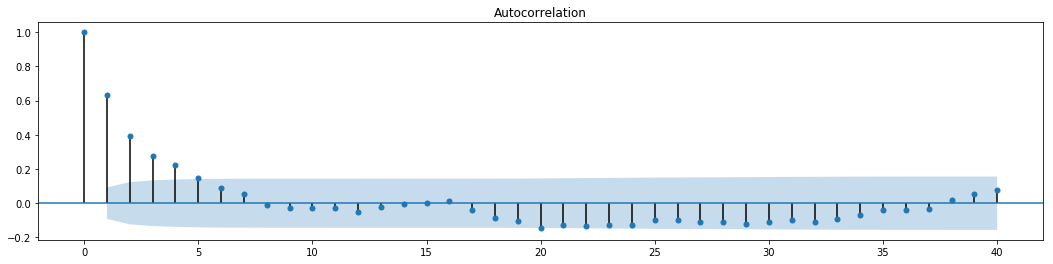

In [8]:
fig, ax = plt.subplots(figsize=(18,4))
plot_acf(ts, ax=ax, lags=40)

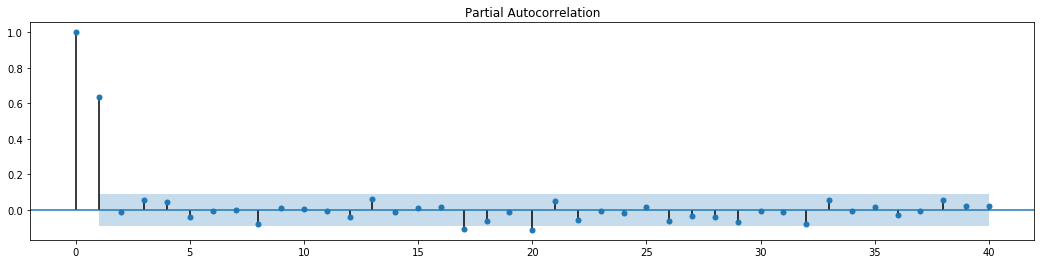

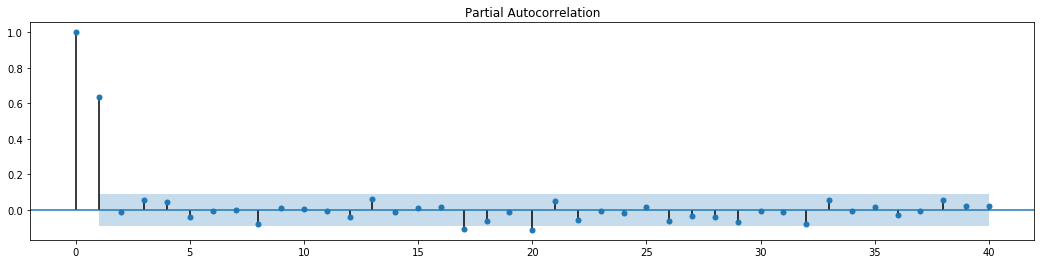

In [9]:
fig, ax = plt.subplots(figsize=(18,4))
plot_pacf(ts, ax=ax, lags=40)

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [10]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(Y, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Tue, 06 Aug 2019   AIC                           1943.395
Time:                        04:42:42   BIC                           1955.756
Sample:                             0   HQIC                          1948.265
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.y        0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [11]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates

dates2 = pd.date_range('2015-04-01', '2015-08-31')
# store the parameters

mu2 = 7
phi2 = .9

error2 = np.random.normal(0,4,len(dates2)+1)


In [12]:
Y2 = []

for i in range(1,len(error2)):
    y_current = mu2 + error2[i] + (phi2*error2[i-1])
    Y2.append(y_current)

In [13]:
ts2 = pd.Series(Y2, index=dates2)

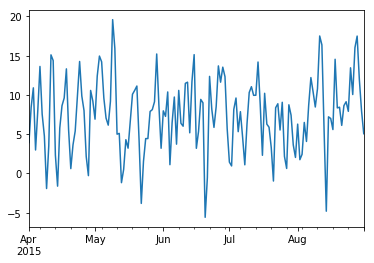

In [14]:
ts2.plot()

## Look at the ACF and PACF of your model and write down your conclusions

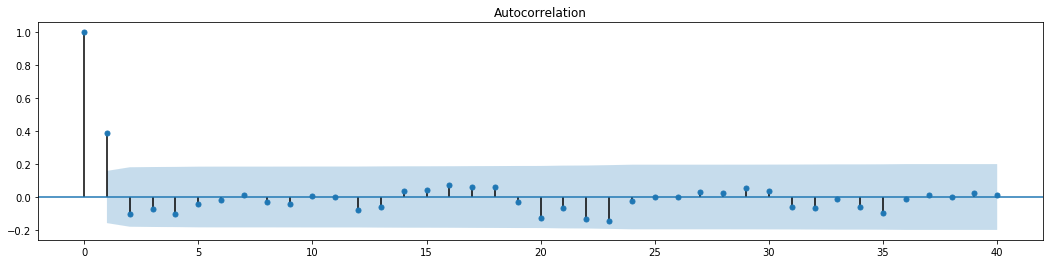

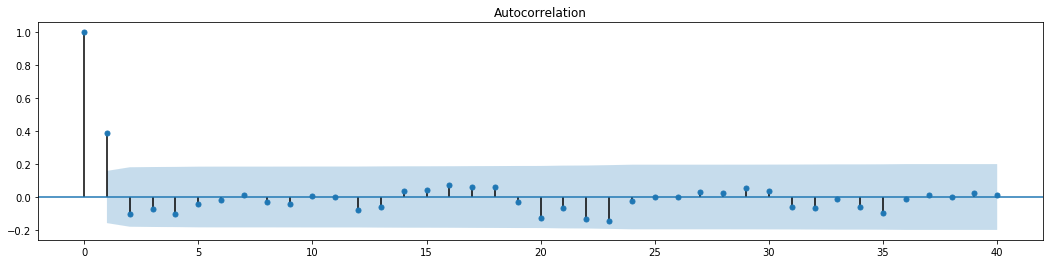

In [15]:
fig, ax = plt.subplots(figsize=(18,4))
plot_acf(ts2, ax=ax, lags=40)

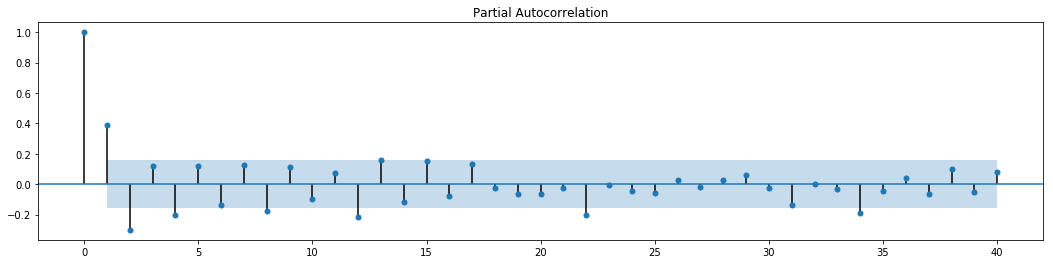

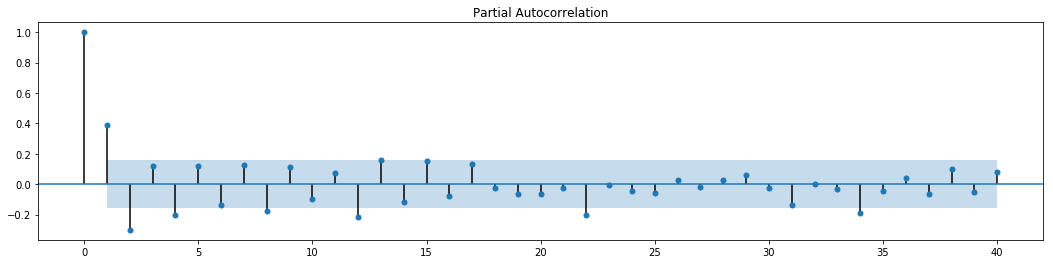

In [16]:
fig, ax = plt.subplots(figsize=(18,4))
plot_pacf(ts2, ax=ax, lags=40)

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [17]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(Y2, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -425.560
Method:                       css-mle   S.D. of innovations              3.887
Date:                Tue, 06 Aug 2019   AIC                            857.119
Time:                        04:42:44   BIC                            866.211
Sample:                             0   HQIC                           860.812
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4673      0.589     12.670      0.000       6.312       8.622
ma.L1.y        0.8813      0.047     18.762      0.000       0.789       0.973
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [18]:
# the data is in "winning_400m.csv"
m400 = pd.read_csv('winning_400m.csv')
m400.head()

,year,winning_times
0,1900,49.4
1,1904,49.2
2,1908,50.0
3,1912,48.2
4,1920,49.6


In [19]:
m400.year = pd.to_datetime(m400.year, format='%Y')
m400.set_index('year', inplace=True)
m400.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot the data

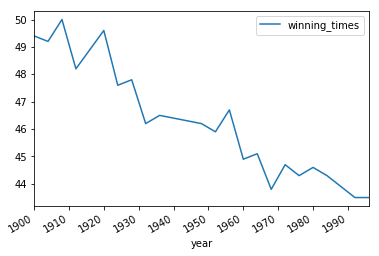

In [20]:
m400.plot()

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

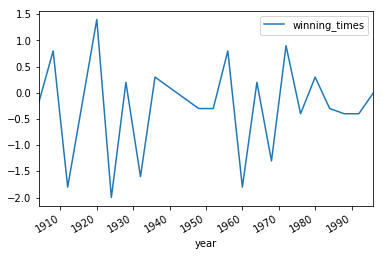

In [21]:
diff_400 = m400.diff()
diff_400.dropna(inplace=True)
diff_400.plot()

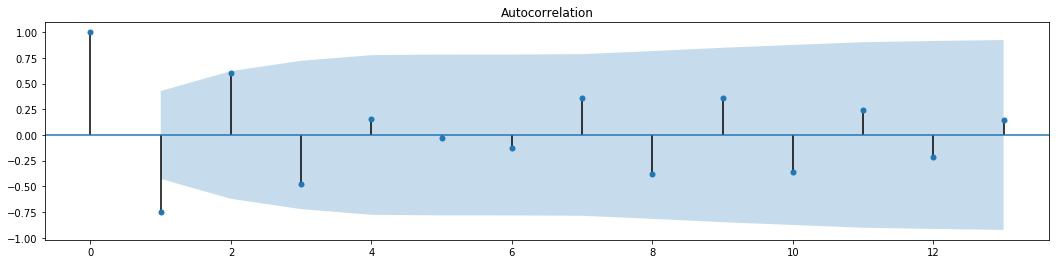

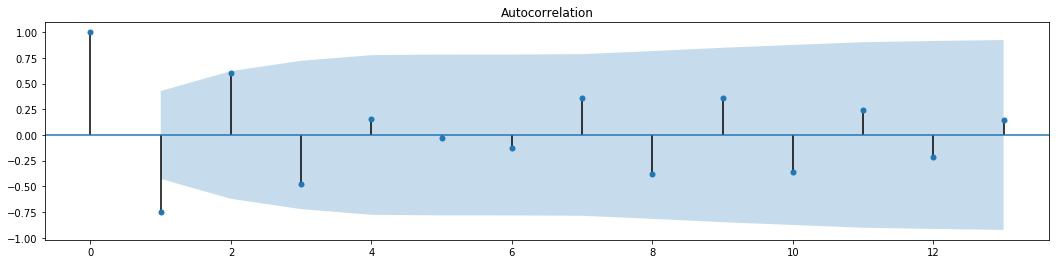

In [22]:
# Look at ACF and PACF
fig, ax = plt.subplots(figsize=(18,4))
plot_acf(diff_400, ax=ax, lags=13)

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


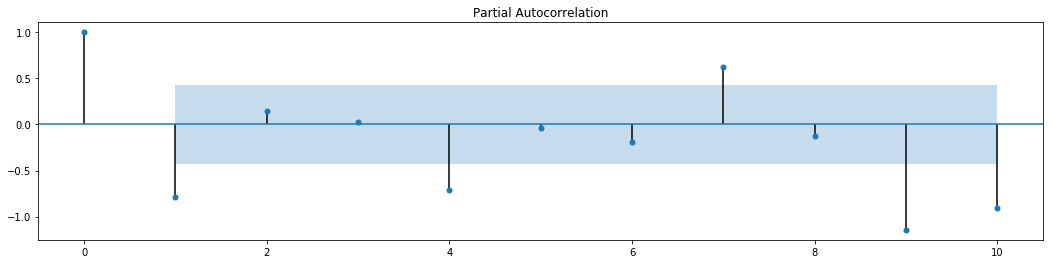

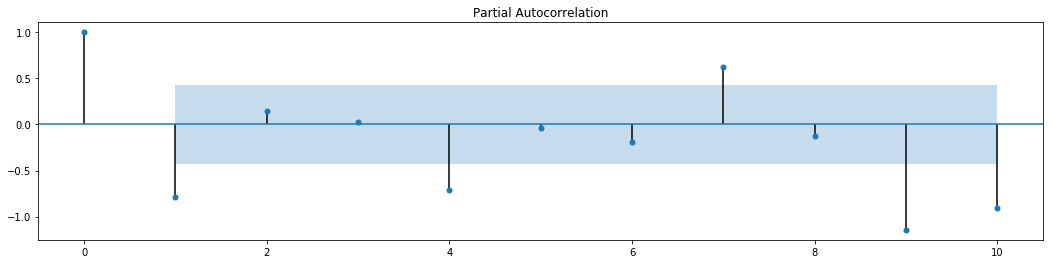

In [23]:
fig, ax = plt.subplots(figsize=(18,4))
plot_pacf(diff_400, ax=ax, lags=10)

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [24]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an ARMA(2,1) model to the first simulated data
mod_arma = ARMA(diff_400, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Tue, 06 Aug 2019   AIC                             44.943
Time:                        04:42:47   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.069      0.000      -1.948      -1.567
ar.L2.winning_ti

In [25]:


mod_arma = ARMA(diff_400, order=(1,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Tue, 06 Aug 2019   AIC                             47.916
Time:                        04:42:47   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.004      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_ti

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [26]:

mod_arma = ARMA(diff_400, order=(1,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 2)   Log Likelihood                 -19.076
Method:                       css-mle   S.D. of innovations              0.558
Date:                Tue, 06 Aug 2019   AIC                             48.152
Time:                        04:42:47   BIC                             53.374
Sample:                             0   HQIC                            49.285
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2784      0.148     -1.876      0.078      -0.569       0.012
ar.L1.winning_times    -0.4717      0.261     -1.807      0.088      -0.983       0.040
ma.L1.winning_ti

## What is your final model? Why did you pick this model?

The Arma(2,2) performed by far the best out of the 3 I tried ((1,1),(1,2))

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.